In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading dataset
loan_dataset = pd.read_csv('loan_data.csv')

In [3]:
# fill the missing values for numerical term(mean)
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mean())
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mean())

In [4]:
# fill the missing valus for categorical term(mode)
loan_dataset['Gender'] = loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0])
loan_dataset['Married'] = loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0])
loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0])
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0])
print(loan_dataset.isnull().sum())
print(loan_dataset.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(614, 13)


In [5]:
# data conversion
loan_dataset_conversion=loan_dataset.replace({'Gender': {'Male': 0, 'Female': 1},
                      'Married': {'No': 0, 'Yes': 1},
                      'Education': {'Not Graduate': 0, 'Graduate': 1},
                      'Self_Employed': {'No': 0, 'Yes': 1},
                      'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
                      'Loan_Status': {'N': 0, 'Y': 1},
                      'Dependents': {'3+': 4}}, inplace=True)


In [6]:
# train test split
data_input = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], )#axis=1
data_output = loan_dataset['Loan_Status']
x, x_test, y, y_test = train_test_split(
    data_input,
    data_output,
    test_size=0.2,
    random_state=1
)
x_train, x_val, y_train, y_val = train_test_split(
    x,
   y,
    test_size=0.33,
    random_state=1
)
print(x_train.shape[0])
print(x_val.shape[0])
print(x_test.shape[0])

328
163
123


In [7]:
#Data Scaleing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [8]:
#to apple z=(x-u)/s standard normal distribution
x_train_scaled= scaler.transform(x_train)
x_val_scaled= scaler.transform(x_val)
x_test_scaled= scaler.transform(x_test)

In [9]:
#function to calculate Accuracy
def evaluate_model(clf,x_train,y_train,x_val,y_val):
    clf.fit(x_train,y_train)
    y_pred_train=clf.predict(x_train)
    y_pred_val=clf.predict(x_val)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_val=accuracy_score(y_val,y_pred_val)
    print(clf.__class__.__name__)
    print('Accuracy of training:',acc_train)
    print('Accuracy of valldation:',acc_val)
    print('-------------------------------')
    return acc_train,acc_val

DecisionTreeClassifier
Accuracy of training: 1.0
Accuracy of valldation: 0.7423312883435583
-------------------------------
SVC
Accuracy of training: 0.8109756097560976
Accuracy of valldation: 0.8098159509202454
-------------------------------
LogisticRegression
Accuracy of training: 0.8079268292682927
Accuracy of valldation: 0.8098159509202454
-------------------------------
KNeighborsClassifier
Accuracy of training: 0.8140243902439024
Accuracy of valldation: 0.7975460122699386
-------------------------------
GaussianNB
Accuracy of training: 0.8109756097560976
Accuracy of valldation: 0.7914110429447853
-------------------------------
VotingClassifier
Accuracy of training: 0.8140243902439024
Accuracy of valldation: 0.8098159509202454
-------------------------------


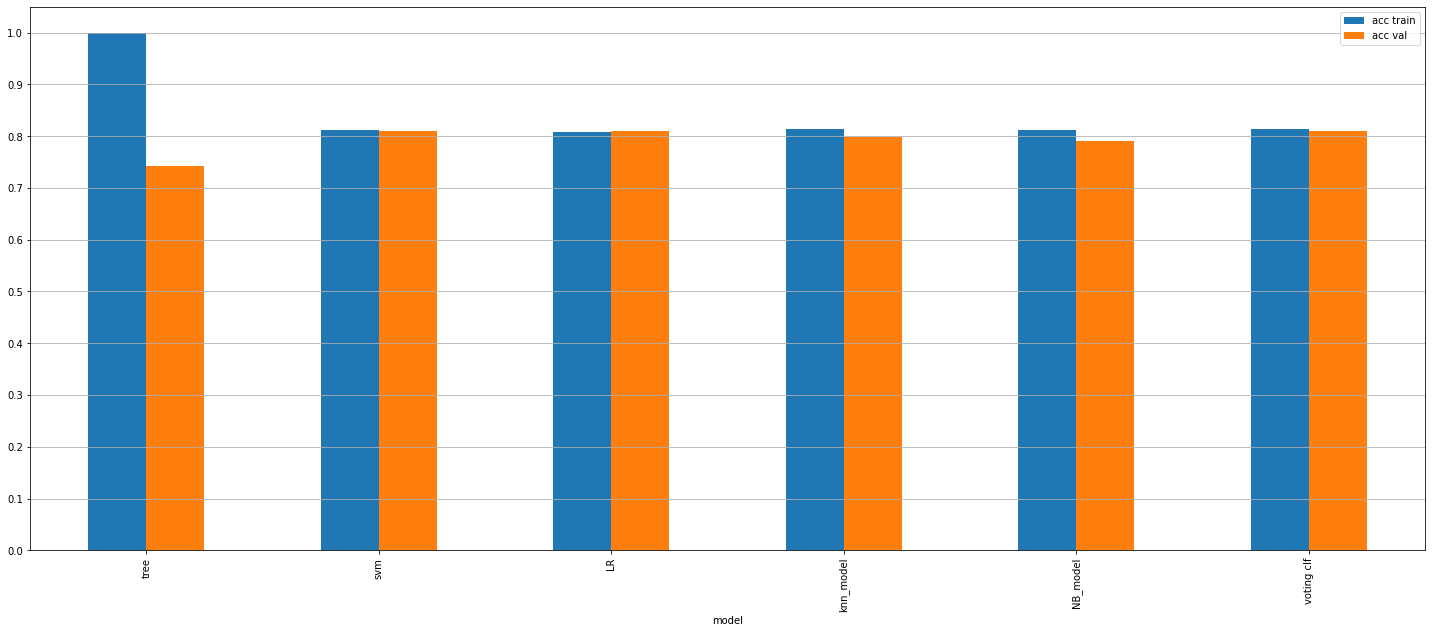

In [10]:
#VotingClassifier
from sklearn.ensemble import VotingClassifier
LR = LogisticRegression(random_state=1)
Dtree = DecisionTreeClassifier(random_state=1)
SVM_model = svm.SVC(kernel='linear')
knn_model = KNeighborsClassifier(n_neighbors=9)
NB_model = GaussianNB()
estimators = [
    ('tree',Dtree),
    ('svm',SVM_model),
    ('LR',LR),
    ('knn_model',knn_model),
    ('NB_model',NB_model)
]
voting_clf = VotingClassifier(estimators)
all_estimators=estimators +[('voting clf',voting_clf)]
result= {
    'model': [],
    'acc train': [],
    'acc val': []
}
for (name,clf) in all_estimators:
    acc_train, acc_val = evaluate_model(clf,x_train_scaled,
                                        y_train,x_val_scaled,y_val)
    result['model'].append(name)
    result['acc train'].append(acc_train)
    result['acc val'].append(acc_val)
results_df=pd.DataFrame(result)
#results_df.plot.bar(x='model',y=['acc train','acc val'])
results_df.plot.bar(x='model',y=['acc train','acc val'],figsize=(25,10))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [11]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    LogisticRegression(random_state=1), n_estimators=100,
    max_samples=0.75, bootstrap=True, random_state=1, n_jobs=-1
)
acc_train_bag, acc_val_bag = evaluate_model(bag_clf,x_train_scaled,
                                        y_train,x_val_scaled,y_val)


BaggingClassifier
Accuracy of training: 0.8109756097560976
Accuracy of valldation: 0.8098159509202454
-------------------------------


In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500,
                                max_depth=3,random_state=1)
acc_train_rf, acc_val_rf = evaluate_model(rf_clf,x_train_scaled,
                                        y_train,x_val_scaled,y_val)


RandomForestClassifier
Accuracy of training: 0.8140243902439024
Accuracy of valldation: 0.8098159509202454
-------------------------------


In [13]:
from sklearn.ensemble import ExtraTreesClassifier
ex_clf = RandomForestClassifier(n_estimators=100,
                                max_depth=4,random_state=1)
acc_train_ex, acc_val_ex = evaluate_model(rf_clf,x_train_scaled,
                                        y_train,x_val_scaled,y_val)


RandomForestClassifier
Accuracy of training: 0.8140243902439024
Accuracy of valldation: 0.8098159509202454
-------------------------------


In [14]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier( max_depth=1,
                           min_samples_leaf=30,random_state=1),
    n_estimators=1000,
    learning_rate = 0.01,
    random_state=1
)
acc_train_ada, acc_val_ada = evaluate_model(ada_clf,x_train_scaled,
                                        y_train,x_val_scaled,y_val)


AdaBoostClassifier
Accuracy of training: 0.8109756097560976
Accuracy of valldation: 0.8098159509202454
-------------------------------


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbct_clf = GradientBoostingClassifier(
    max_depth=1,n_estimators=100,
    learning_rate = 0.05,random_state=1)
acc_train_gbct, acc_val_gbct = evaluate_model(gbct_clf,x_train_scaled,
                                        y_train,x_val_scaled,y_val)


GradientBoostingClassifier
Accuracy of training: 0.8170731707317073
Accuracy of valldation: 0.8159509202453987
-------------------------------


In [16]:
all_results = {
    'Model' : [],
    'Acc train' : [],
    'Acc val' : []
}
all_results['Model'] = result['model'] + ['bagging', 'rf', 'ex', 'ada','gbct']
all_results['Acc train'] = result['acc train'] + [acc_train_bag, acc_train_rf, acc_train_ex, acc_train_ada,acc_train_gbct]
all_results['Acc val'] = result['acc val'] + [acc_val_bag, acc_val_rf, acc_val_ex, acc_val_ada,acc_val_gbct]
all_results_df = pd.DataFrame(all_results)
all_results_df = all_results_df.sort_values(by='Acc val', ascending=False, ignore_index=True)


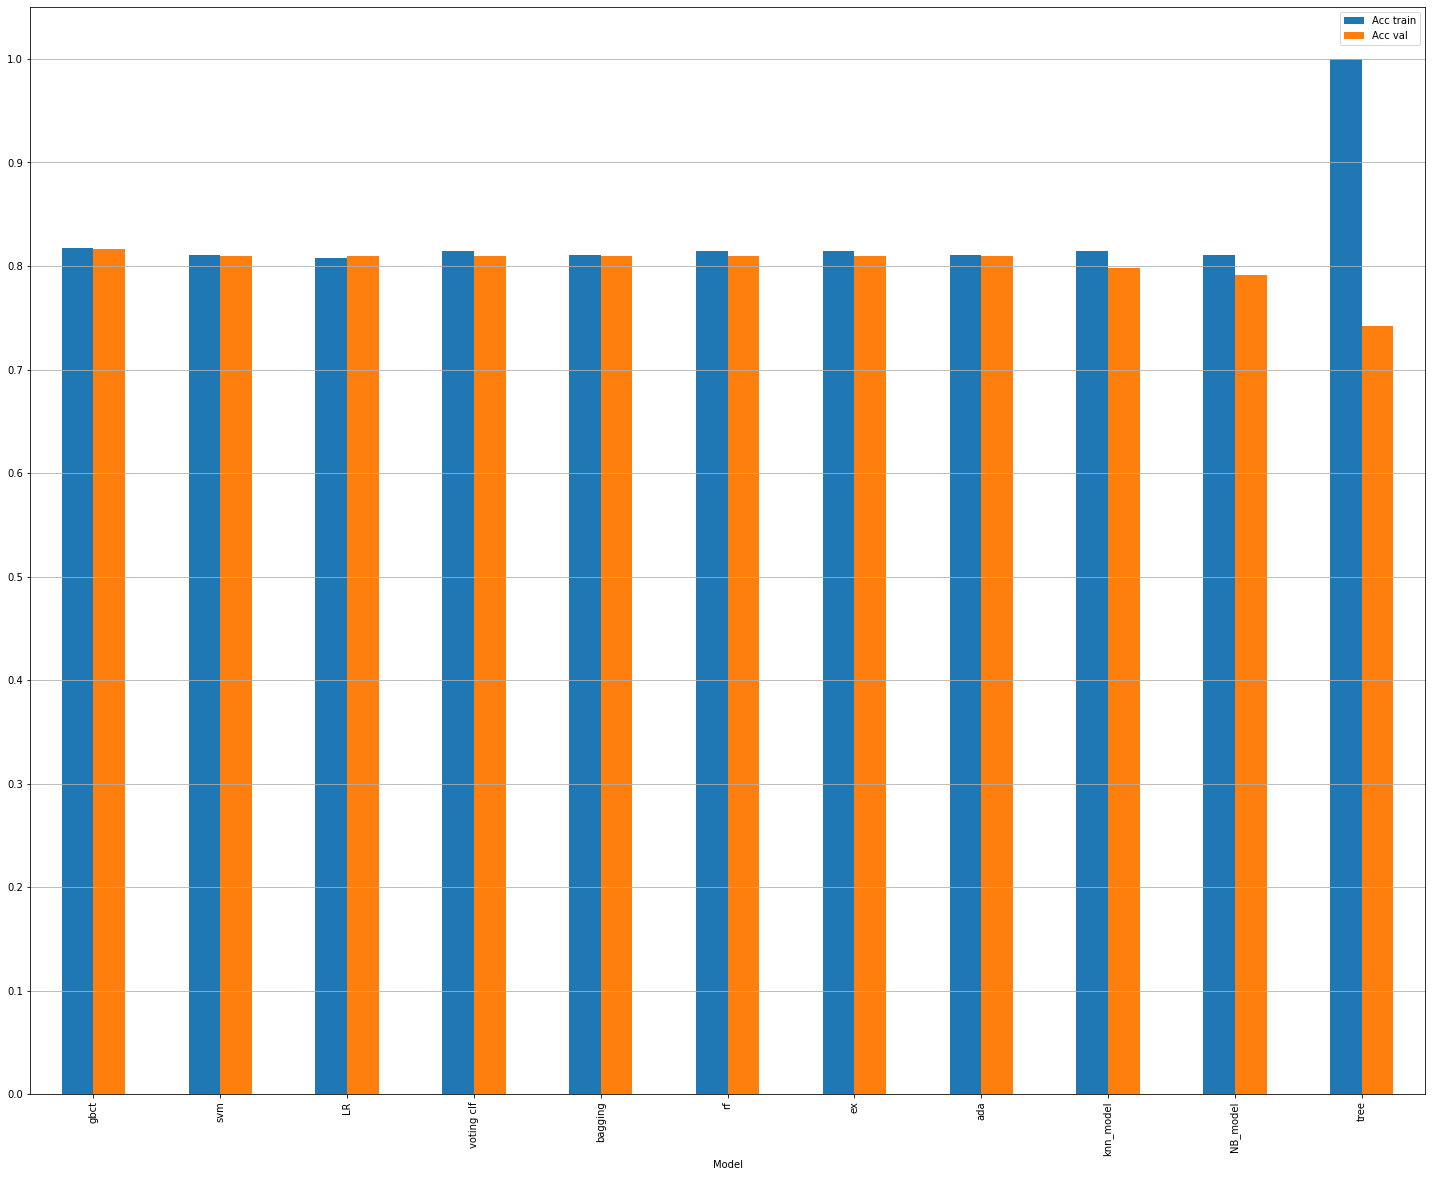

In [20]:
all_results_df.plot.bar(x='Model',y=['Acc train','Acc val'],figsize=(25,20))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [18]:
model_best=GradientBoostingClassifier(
    max_depth=1,n_estimators=100,
    learning_rate = 0.05,random_state=1)
model_best.fit(x_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=1, random_state=1)

In [19]:
y_pred_test= model_best.predict(x_test_scaled)
accuracy_score(y_test, y_pred_test)

0.7967479674796748